# this is any extra code for plots required by the bond paper

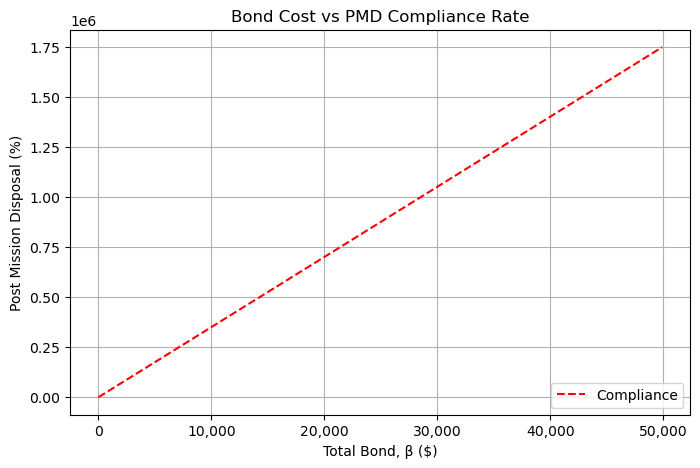

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define a formatter function
def comma_formatter(x, pos):
    return f'{int(x):,}'

# Define x-axis: Bond Cost ($) from 0 to 1,000,000 in increments of 100,000
bond_cost = np.arange(0, 50000, 100)

# Define the logistic-like compliance rate function
compliance_rate = 100 / (1 + np.exp(-0.00001 * (bond_cost - 500_000)))

# Define the exponential compliance rate function
def compliance_function_2(b):
    return 0.65 + 0.35 * (b)

# Compute values for the exponential function
compliance_rate_2 = compliance_function_2(bond_cost)

# Scale the exponential function to percentage terms
compliance_rate_2_scaled = compliance_rate_2 * 100

# Create the plot
plt.figure(figsize=(8, 5))
# plt.plot(bond_cost, compliance_rate, linestyle='-', color='b', label="PMD Compliance Rate (Logistic)")
plt.plot(bond_cost, compliance_rate_2_scaled, linestyle='--', color='r', label="Compliance")

# Labels and title
plt.xlabel(r"Total Bond, β ($)")
plt.ylabel("Post Mission Disposal (%)")
plt.title("Bond Cost vs PMD Compliance Rate")
# plt.ylim(60, 100)  # Keep y-axis limit slightly above 100% for clarity
plt.grid(True)
plt.legend(loc='lower right')

plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_formatter))

# Show the plot
plt.show()

# Naturally Compliant Orbits

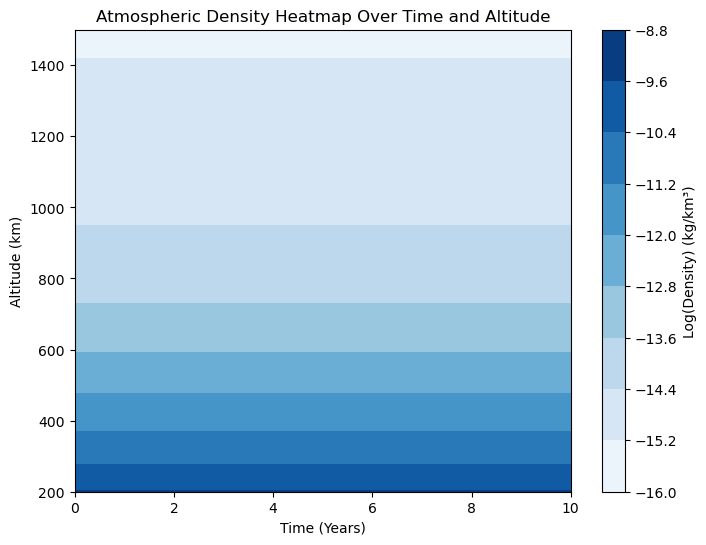

In [16]:
from pyssem.utils.drag.drag import densityexp

# Define time range (years) and altitude range (km)
years = np.arange(0, 11, 1)  # 10 years, yearly intervals
altitudes = np.arange(200, 1550, 50)  # 200 km to 1500 km, every 50 km
T, H = np.meshgrid(years, altitudes)


density_values = np.array([densityexp(altitudes)] * len(years)).T  # Repeat across time dimension

# Create the heatmap plot
plt.figure(figsize=(8, 6))
plt.contourf(T, H, np.log10(density_values), cmap="Blues")  # Log scale for better visualization

# Labels and title
plt.xlabel("Time (Years)")
plt.ylabel("Altitude (km)")
plt.title("Atmospheric Density Heatmap Over Time and Altitude")
cbar = plt.colorbar(label="Log(Density) (kg/km³)")

# Show the plot
plt.show()

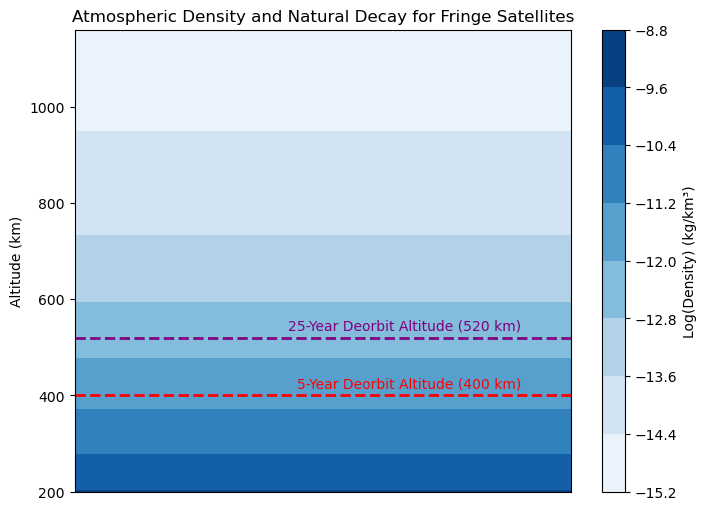

: 

In [ ]:
# Redefine necessary functions and imports since execution state was reset
import numpy as np
import matplotlib.pyplot as plt


# Define time range (years) and altitude range (km)
years = np.arange(0, 11, 1)  # 10 years, yearly intervals
altitudes = np.arange(200, 1200, 40)  # 200 km to 1500 km, every 50 km
T, H = np.meshgrid(years, altitudes)

# Compute cumulative residence times
cumulative_residence_times = [0.28545556713373055, 0.7610508871863472, 1.5483122423786122, 2.8346640378780457, 4.904346828559174, 8.20883936002697, 13.484900655514746, 21.76302754923995, 34.30522233406589, 53.30808243220308, 82.10011565363439, 122.39919379753357, 178.8047331717212, 257.7547518250079, 361.2956354851116, 492.739542786509, 659.6074404785045, 866.2185891684152, 1109.5646833299154, 1396.1795126959312, 1733.7647869288348, 2110.570434073066, 2531.1564926961883, 3000.6135532389762, 3524.6245264819395, 4109.533607580656, 4762.4232743662005, 5491.200256413817, 6304.6915206014455, 7212.751440841693, 8226.381455864086, 9357.863671010111, 10620.910029837094, 12030.828870980395, 13604.710897510642, 15361.636822528253, 17322.90921884735, 19512.311395558758, 21956.396453626843, 24684.810040488064]

cumulative_residence_times = np.array(cumulative_residence_times)
# Define disposal time thresholds in years
disposal_times = [5, 25]  # 5-year and 25-year deorbit thresholds

# Find the altitudes corresponding to these disposal times
altitudes_at_disposal = []
for disposal_time in disposal_times:
    idx = np.argmax(cumulative_residence_times >= disposal_time)  # Find first index exceeding disposal time
    if cumulative_residence_times[idx] < disposal_time:
        altitudes_at_disposal.append(None)  # If no valid altitude is found
    else:
        altitudes_at_disposal.append(altitudes[idx])

# Create the heatmap plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(T, H, np.log10(np.array([densityexp(altitudes)] * len(years)).T), cmap="Blues")  # Log scale

# Plot horizontal dashed lines for deorbit thresholds with different styles
line_styles = ['--', '--']  # Different dash styles
colors = ['red', 'purple']  # Different colors

for i, (disposal_time, altitude) in enumerate(zip(disposal_times, altitudes_at_disposal)):
    if altitude is not None:
        plt.axhline(y=altitude, color=colors[i], linestyle=line_styles[i], linewidth=2)
        plt.text(x=max(years) - 1, y=altitude + 10, s=f"{disposal_time}-Year Deorbit Altitude ({altitude} km)", 
                 color=colors[i], fontsize=10, verticalalignment='bottom', horizontalalignment='right')

# Labels and title
# Remove x axis ticks
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
# plt.xlabel("Time (Years)")
plt.ylabel("Altitude (km)")
plt.title("Atmospheric Density and Natural Decay for Fringe Satellites")
plt.colorbar(contour, label="Log(Density) (kg/km³)")

# Show the plot
plt.show()

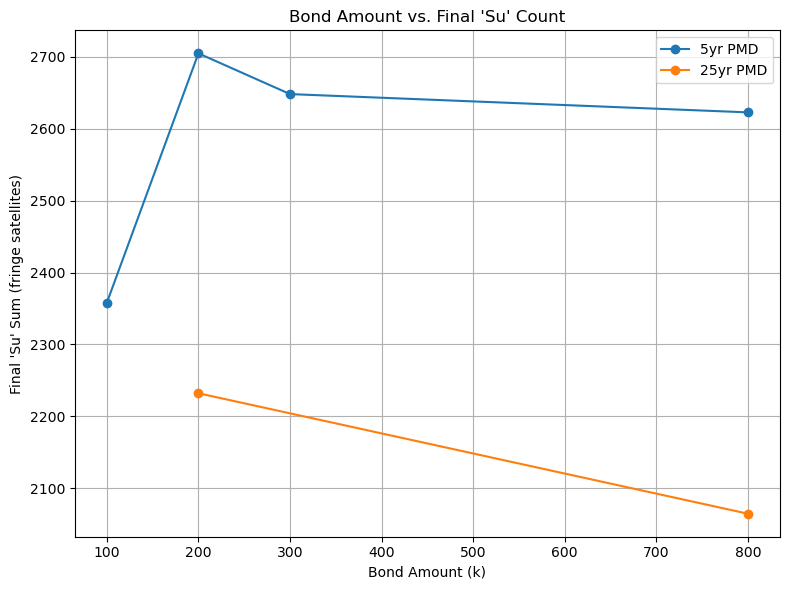

In [15]:
path = r'C:\Users\IT\Documents\UCL\OPUS\Results\UMPY_testing'

import os
import json
import re
import numpy as np
import matplotlib.pyplot as plt

import os
import json
import re
import numpy as np
import matplotlib.pyplot as plt

root_folder = r'C:\Users\IT\Documents\UCL\OPUS\Results\UMPY_testing'
"""
Traverse 'root_folder', find subfolders ending with 'k' (e.g. 'bond_100k', 'bond_200k', etc.).
Additionally, if the folder ends with '25yr PMD', it is treated as a 25-year PMD scenario;
otherwise it is treated as a 5-year PMD scenario.

In each valid folder, parse the 'species_data' JSON to extract the final row sum for 'Su'.
Then produce a line plot with two lines:
    - '5yr PMD' (folders without '25yr PMD' at the end)
    - '25yr PMD' (folders ending with '25yr PMD')

The X-axis is the bond amount (parsed from folder name), and the Y-axis is the final sum of 'Su'.
"""

# Separate lists for 5yr PMD vs 25yr PMD
bond_amounts_5yr = []
su_sums_5yr = []

bond_amounts_25yr = []
su_sums_25yr = []

# 1) Loop through each item in the root folder
for folder_name in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder_name)

    # 2) Check if it's a directory and ends with 'k'
    #    e.g., 'bond_100k', 'bond_200k', or 'bond_100k_25yr PMD'
    if os.path.isdir(folder_path) and folder_name.endswith("k") or folder_name.endswith("25yr"):
        # Determine if this is a 25yr folder
        # e.g. 'bond_100k_25yr PMD'
        is_25yr = folder_name.endswith("25yr")

        # Extract the bond amount (the numeric part)
        # from something like 'bond_100k_25yr PMD' -> '100'
        match = re.findall(r'\d+', folder_name)
        if not match:
            print(f"Warning: Could not parse bond amount in folder: {folder_name}")
            continue
        
        # Convert to integer or float
        bond_value = float(match[0])

        # 3) Within this folder, look for a JSON file starting with 'species_data'
        species_data_file = None
        for f in os.listdir(folder_path):
            if f.startswith("species_data") and f.endswith(".json"):
                species_data_file = os.path.join(folder_path, f)
                break
        
        if species_data_file is None:
            print(f"Warning: No 'species_data' JSON found in {folder_path}. Skipping.")
            continue

        # 4) Parse the JSON and extract final row sum for 'Su'
        with open(species_data_file, "r") as infile:
            data = json.load(infile)

        # su_array is a 2D list: su_array[time_index][shell_index]
        su_array = data.get("Su")
        if not su_array:
            print(f"Warning: 'Su' not found in {species_data_file}. Skipping.")
            continue

        final_su_sum = sum(su_array[-1])  # sum of the last row

        # 5) Store bond amount and final sum in the appropriate list
        if is_25yr:
            bond_amounts_25yr.append(bond_value)
            su_sums_25yr.append(final_su_sum)
        else:
            bond_amounts_5yr.append(bond_value)
            su_sums_5yr.append(final_su_sum)

# If we have no data at all, exit
if not bond_amounts_5yr and not bond_amounts_25yr:
    print("No bond folders with valid data found. No plot will be created.")

# Sort each list by bond amount so that the lines are plotted in ascending order
def sort_by_bond(bonds, sums):
    paired = sorted(zip(bonds, sums), key=lambda x: x[0])
    return zip(*paired) if paired else ([], [])

bond_5yr_sorted, su_5yr_sorted = sort_by_bond(bond_amounts_5yr, su_sums_5yr)
bond_25yr_sorted, su_25yr_sorted = sort_by_bond(bond_amounts_25yr, su_sums_25yr)

# 6) Create a line plot
plt.figure(figsize=(8, 6))

# Plot 5yr PMD if we have any data
if bond_5yr_sorted:
    plt.plot(bond_5yr_sorted, su_5yr_sorted, marker='o', linestyle='-', label="5yr PMD")

# Plot 25yr PMD if we have any data
if bond_25yr_sorted:
    plt.plot(bond_25yr_sorted, su_25yr_sorted, marker='o', linestyle='-', label="25yr PMD")

plt.xlabel("Bond Amount (k)")
plt.ylabel("Final 'Su' Sum (fringe satellites)")
plt.title("Bond Amount vs. Final 'Su' Count")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the figure
output_path = os.path.join(root_folder, "bond_amount_vs_final_su.png")
# plt.savefig(output_path, dpi=300)
plt.show()

In [11]:
bond_25yr_sorted

[]